## 3.4 **Analyse en composantes principales**

On réalise une analyse en composantes principales à l'échelle du département, afin d'obtenir une représentation graphique facilement interprétable des départements qui se distinguent le plus en fonction des covariables retenues. 

Pour ce faire, on utilise le data frame **df_final_dep**, qui contient les données agrégées à l'échelle de chacun des départements. 

In [ ]:
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df_acp_dep = df_final_dep
df_acp_dep['DEP'] = df_acp_dep['DEP'].replace('2A', 200)
df_acp_dep['DEP'] = df_acp_dep['DEP'].replace('2B', 201)
#On a besoin de recoder les valeurs départementales de la Corse pour ne plus avoir de chaîne de caractères. 

df_acp_dep.index = df_acp_dep.DEP
#On veut indexer les valeurs de la base par le département, pour une lecture claire de l'ACP
df_acp_dep = df_acp_dep[['P17_POP', 'MED17', 'T17_CHOM1564', 'Taux_sup', 'part_fav',
       'taux_retard_sixième', 'nb_cinema']]

df_acp_dep = df_acp_dep.fillna(df_acp_dep.mean())
#On remplace les valeurs manquantes par la moyenne, notamment pour la variable Prixm2 qui compte des NaN 

X = df_acp_dep.values
names = df_acp_dep.index 
features = df_acp_dep.columns
n_comp = 7
# Nombre de composante maximale

sc = StandardScaler()
Z = sc.fit_transform(X)
#On a besoin de centrer les données pour réaliser l'ACP 



acp = PCA(svd_solver='full')
coord = acp.fit_transform(Z)


p = len(df_acp_dep.columns)
n = len(df_acp_dep)
# Scree Test
bs = 1/numpy.arange(p,0,-1)
bs = numpy.cumsum(bs)
bs = bs[::-1]

eigval = (n-1)/n*pca.explained_variance_
print(pd.DataFrame({'Val.Propre':eigval,'Seuils':bs}))

print(acp.explained_variance_ratio_)



   Val.Propre    Seuils
0    4.256296  2.592857
1    1.163694  1.592857
2    0.806758  1.092857
3    0.354277  0.759524
4    0.201008  0.509524
5    0.146700  0.309524
6    0.071268  0.142857
[0.60804222 0.16624207 0.11525108 0.05061097 0.02871542 0.02095713
 0.01018111]


Sur le tableau ci-dessus (Scree Test), on remarque que seul le premier axe factoriel présente une valeur propre supérieure au seuil considéré. De plus, le premier axe factoriel permet d'expliquer plus de 60% de l'inertie du nuage des départements. 
On représente néanmoins les départements en fonction des deux premiers axes afin d'obtenir une représentation graphique lisible. 

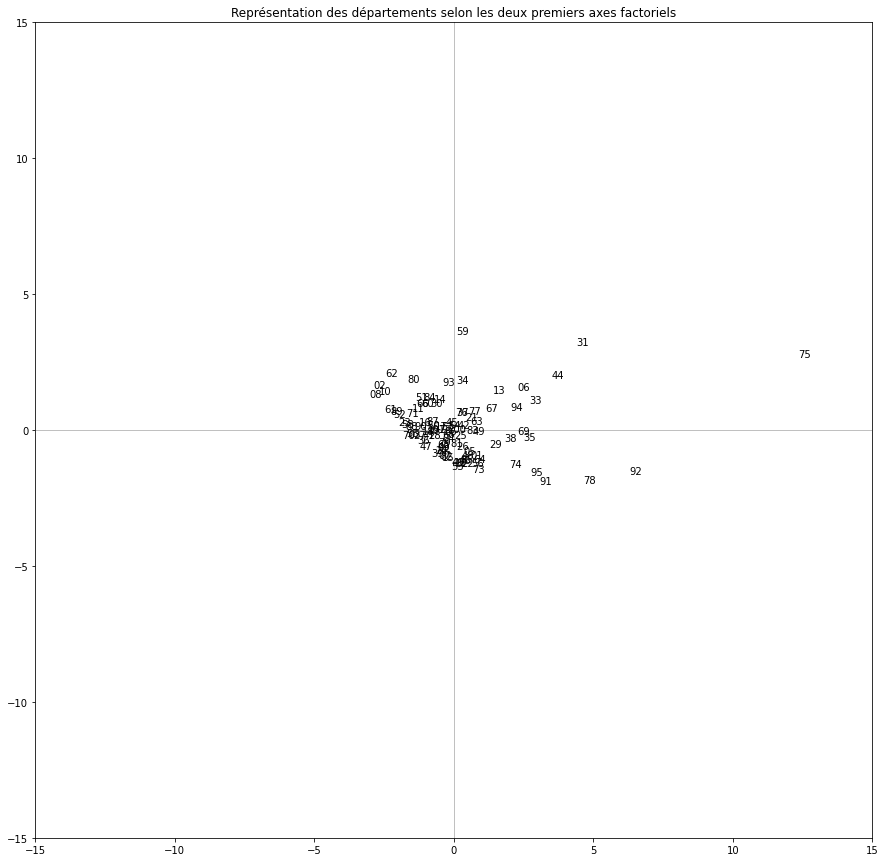

In [ ]:
fig, axes = plt.subplots(figsize=(15,15))
axes.set_xlim(-15,15) #même limites en abscisse
axes.set_ylim(-15,15) #et en ordonnée
#placement des étiquettes des observations
for i in range(n):
 plt.annotate(names[i],(coord[i,0],coord[i,1]))
#ajouter les axes
plt.plot([-15,15],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-15,15],color='silver',linestyle='-',linewidth=1)
plt.title("Représentation des départements selon les deux premiers axes factoriels")
plt.show()


Le graphique ci-dessus permet une représentation des départements en deux dimensions. Comme le premier axe factoriel explique beaucoup plus l'inertie du nuage que le second axe, on remarque que le nuage de points des départements est allongé horizontalement. On doit maintenant déterminer quelles covariables sont le plus corrélées aux deux axes, afin d'interpréter la dispersion du nuage de points. 

In [ ]:
# On calcule la corrélation de chacune des variables avec les axes
sqrt_eigval = numpy.sqrt(eigval)
corvar = numpy.zeros((p,p))
for k in range(p):
 corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]

#On se concentre tout d'abord sur le premier axes
print(pd.DataFrame({'Nom de la covariable': features,'corrélation avec le premier axe':corvar[:,0]}).sort_values(by = 'corrélation avec le premier axe', ascending = False))


  Nom de la covariable  corrélation avec le premier axe
1                MED17                         0.920023
3             Taux_sup                         0.913131
4             part_fav                         0.829771
6            nb_cinema                         0.812625
0              P17_POP                         0.742330
5  taux_retard_sixième                        -0.490873
2         T17_CHOM1564                        -0.659664
  Nom de la covariable  corrélation avec le 2ème axe
0              P17_POP                      0.595997
1                MED17                     -0.148153
2         T17_CHOM1564                      0.425829
3             Taux_sup                      0.076100
4             part_fav                     -0.260098
5  taux_retard_sixième                      0.548593
6            nb_cinema                      0.480423


On remarque que les variables les plus corrélées positivement au premier axe sont la médiane du niveau de vie (**MED17**), et le taux de personnes disposant d'un diplôme supérieur au baccalauréat par commune(**Taux_sup**). Comme on aurait pu l'intuiter, les variables les plus corrélées négativement au premier axe sont le taux de retard en sixième (**taux_retard_sixieme**), et le taux de chômage **T17_CHOM1564**. 

On constate que les départements qui se distinguent des autres par leur niveau de vie élevé et leur fort taux de diplômés de l'enseignement supérieur( et leurs faibles taux de chômage et taux de retard en sixième), sont le 75 (Paris), et dans une moindre mesure, le 78 (Yvelines), le 92 (Hauts-de-Seine), le 44 (Loire-Atlantique) et le 31 (Haute-Garrone). 

On remarque que le nuage de points est très compact sur la partie gauche du premier axe factoriel. On réalise donc un zoom de la représentation graphique de l'analyse en composantes principales, pour déterminer les départements qui se distinguent le plus selon ces variables. 

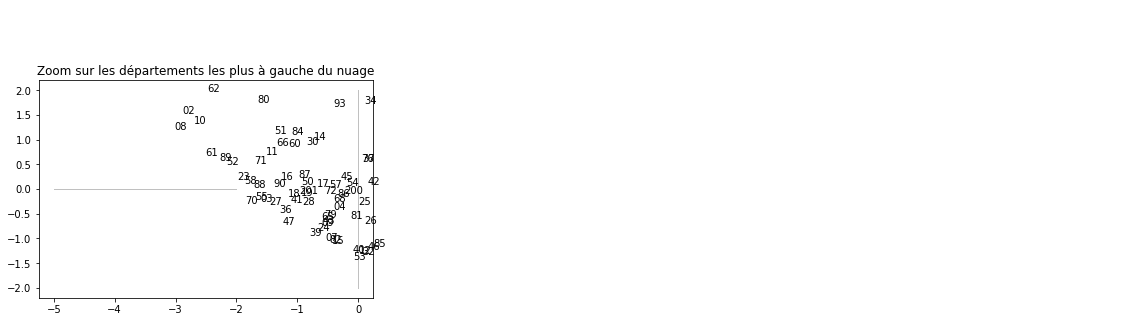

In [ ]:
axes.set_xlim(-5,-2) #même limites en abscisse
axes.set_ylim(-2,2) #et en ordonnée
#placement des étiquettes des observations
for i in range(n):
 plt.annotate(names[i],(coord[i,0],coord[i,1]))
#ajouter les axes
plt.plot([-5,-2],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-2,2],color='silver',linestyle='-',linewidth=1)
plt.title("Zoom sur les départements les plus à gauche du nuage")
plt.show()

On remarque que les individus qui se distinguent le plus des autres par leur fort taux de chômage et le fort taux de retard en sixième (et leur fort taux de revenu médian et taux de diplômés de l'enseignement supérieur) sont le 8 (Ardennes), le 2 (Aisne) et le 10 (Aube). 

Cependant, ils sont beaucoup plus similaires au reste du nuage que les départements qui se distinguent par le revenu médian élevé (on a du réaliser un zoom pour les observer). 

In [ ]:
print(pd.DataFrame({'Nom de la covariable': features, 'corrélation avec le 2ème axe':corvar[:,1]}).sort_values(by = 'corrélation avec le 2ème axe', ascending = False))

  Nom de la covariable  corrélation avec le 2ème axe
0              P17_POP                      0.595997
5  taux_retard_sixième                      0.548593
6            nb_cinema                      0.480423
2         T17_CHOM1564                      0.425829
3             Taux_sup                      0.076100
1                MED17                     -0.148153
4             part_fav                     -0.260098


Les variables les plus corrélées au second axe factoriel sont la population (**P17_POP**), et le taux de retard en sixième (**taux_retard_sixième**). A la lecture du tableau, on constate qu'aucune des covariables n'est corrélée négativement de façon significative au 2ème axe.

Les départements qui se distinguent le plus des autres par leur population et leur taux de retard en sixième élevés sont le 59 (Nord), le 93 (Seine-Saint-Denis) et le 34 (Hérault).
